Ce dataset contient des informations sur 1 000 élèves, leurs résultats aux examens, ainsi que des informations démographiques et socio-économiques sur eux et leur famille.<br>
Le but de cet exercice est de comprendre les facteurs qui influencent les résultats des élèves aux examens en utilisant des données telles que le sexe, la race/origine ethnique, le niveau d'études des parents, la préparation aux examens, etc.<br>
Ces dernières variables représentent donc les features du dataset et l'objectif ou target sera ici le résultat (positif ou négatif) des élèves à l'examen.

## 0. Préalable

Importation des modules

In [23]:
# analyse de données
import numpy as np
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

Chargement du jeu de données

In [25]:
students_0 = pd.read_csv('StudentsPerformance.csv')
students_0.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
893,male,group D,some high school,standard,completed,88,74,75
737,female,group B,some college,free/reduced,completed,53,66,73
449,male,group B,associate's degree,standard,none,81,73,72
495,male,group D,high school,standard,completed,68,64,66
108,female,group B,associate's degree,free/reduced,none,52,76,70


In [26]:
# on réalise une copie de notre dataset pour ne pas l'altérer durant notre étude
students = students_0.copy()

## 1. Analyse exploratoire

### 1.1. Analyse de la forme

Dimension du dataset

In [30]:
students.shape

(1000, 8)

Analyse du type de chaque variable

In [27]:
students.info() # description générale du dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
students.dtypes.value_counts()

object    5
int64     3
dtype: int64

Ce dataset comporte 5 variables quantitatives et 3 variables qualitatives.

Analyse des variables qualitatives

In [29]:
students.select_dtypes(include='object').describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [35]:
for i in range(4):
    print(students.columns[i])
    print(students[students.columns[i]].value_counts(), '\n')

female    518
male      482
Name: gender, dtype: int64 

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64 

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64 

standard        645
free/reduced    355
Name: lunch, dtype: int64 



Analyse des variables quantitatives

In [28]:
students.select_dtypes(include='number').describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Analyse des valeurs manquantes

In [32]:
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Il apparaît clairement que le dataset ne présente aucune donnée manquante. Super !

### 1.2. Analyse de fond

Visualisation de la target

Nous avons désigné comme target le résultat de l'élève à l'examen. Il s'agit de savoir s'il a été admis, auquel cas sa moyenne sera supérieure à 10, ou non admis dans le cas contraire.
Cependant, cette variable n'est pas présente dans notre dataset. Nous allons devoir l'ajouter de manière explicite.

Ajoutons au dataset la colonne 'score_mean' contenant la moyenne des élèves à l'issue des 3 matières.

In [36]:
students_means_list = []
for row in students.iterrows(): # pour chaque étudiant
    student_means = [row[1][-3], row[1][-2], row[1][-1]] # student_means = [math_score, reading_score, writing_score]
    students_means_list.append(student_means)
scores_means_list = []
for student_means in students_means_list:
    scores_means_list.append(round(np.mean(student_means), 1))

In [37]:
students["score_mean"] = scores_means_list
students.sample(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean
974,female,group A,some college,standard,none,54,63,67,61.3
63,female,group C,associate's degree,standard,none,69,80,71,73.3
766,female,group C,high school,standard,completed,58,75,77,70.0


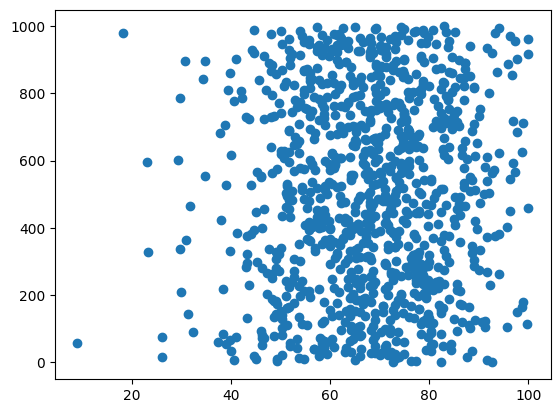

In [47]:
plt.scatter(students['score_mean'], students.index)

Analyse et visualisation de la distribution des variables quantitatives (scores) en fonction des variables qualitatives (features) 

In [49]:
features_columns = list(students.select_dtypes(include='object').columns) # la liste des colonnes discrètes
scores_columns = list(students.select_dtypes(include='number').columns) # la liste des colonnes continues

<< math score >>


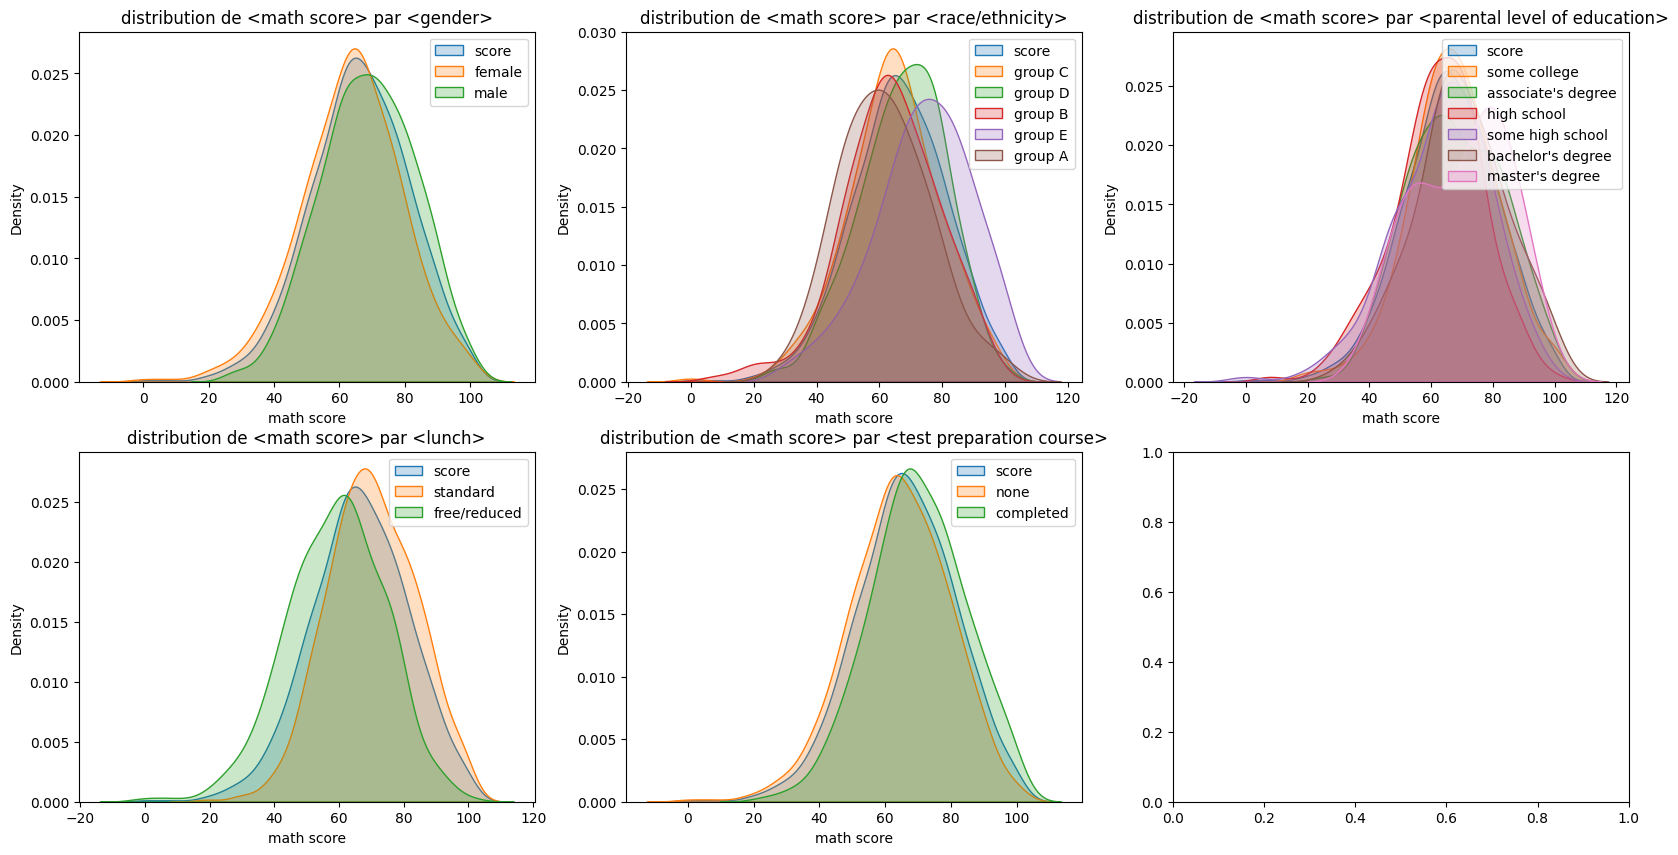

<< reading score >>


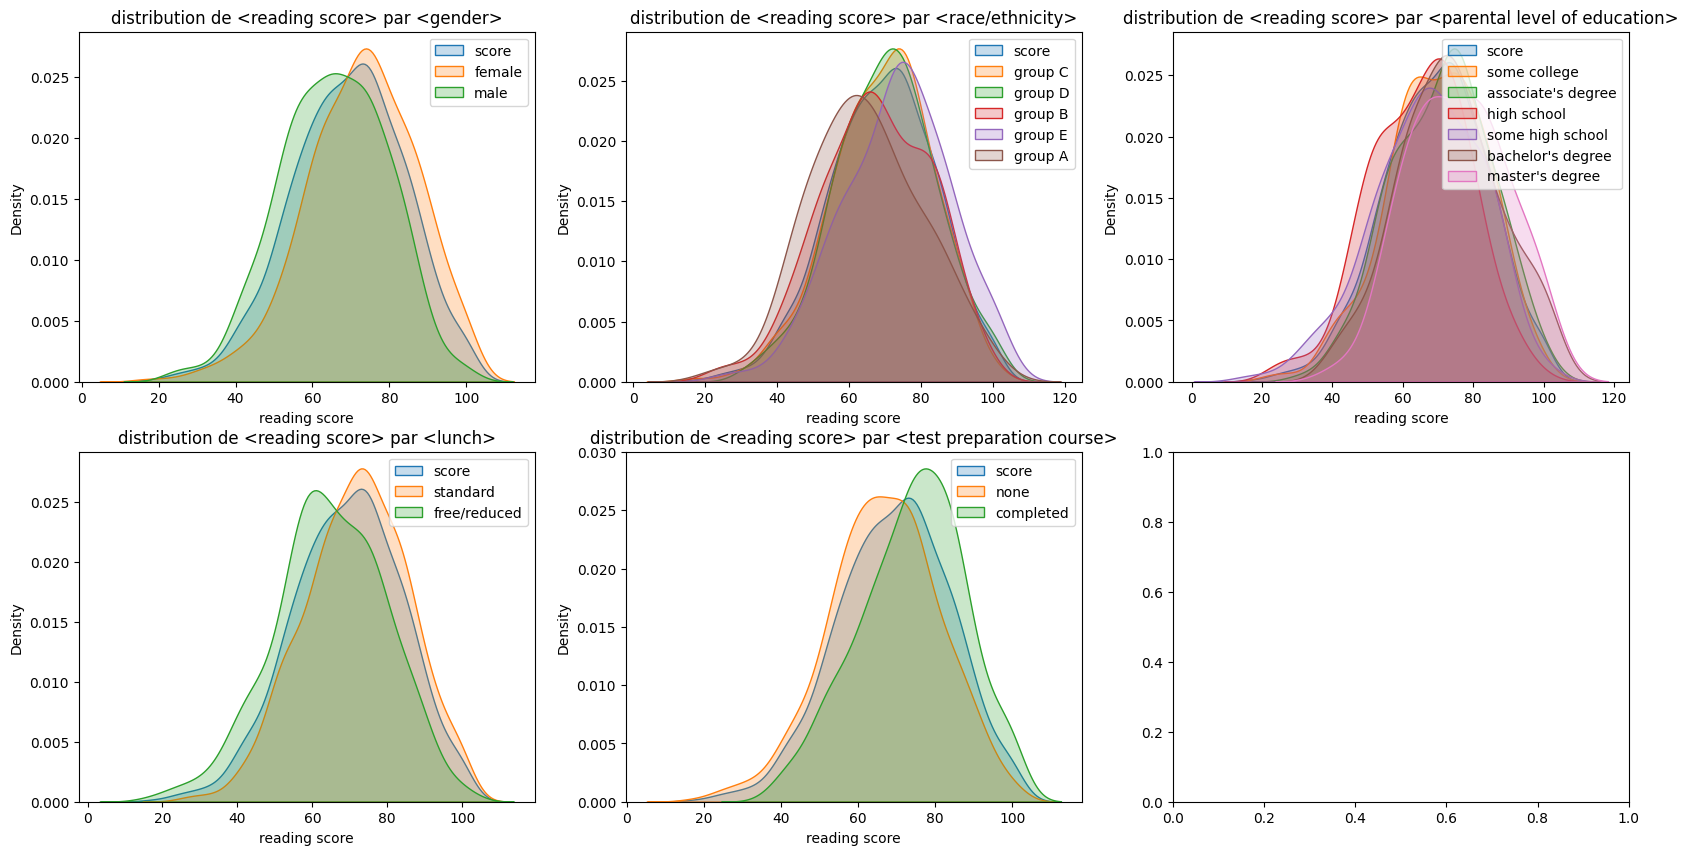

<< writing score >>


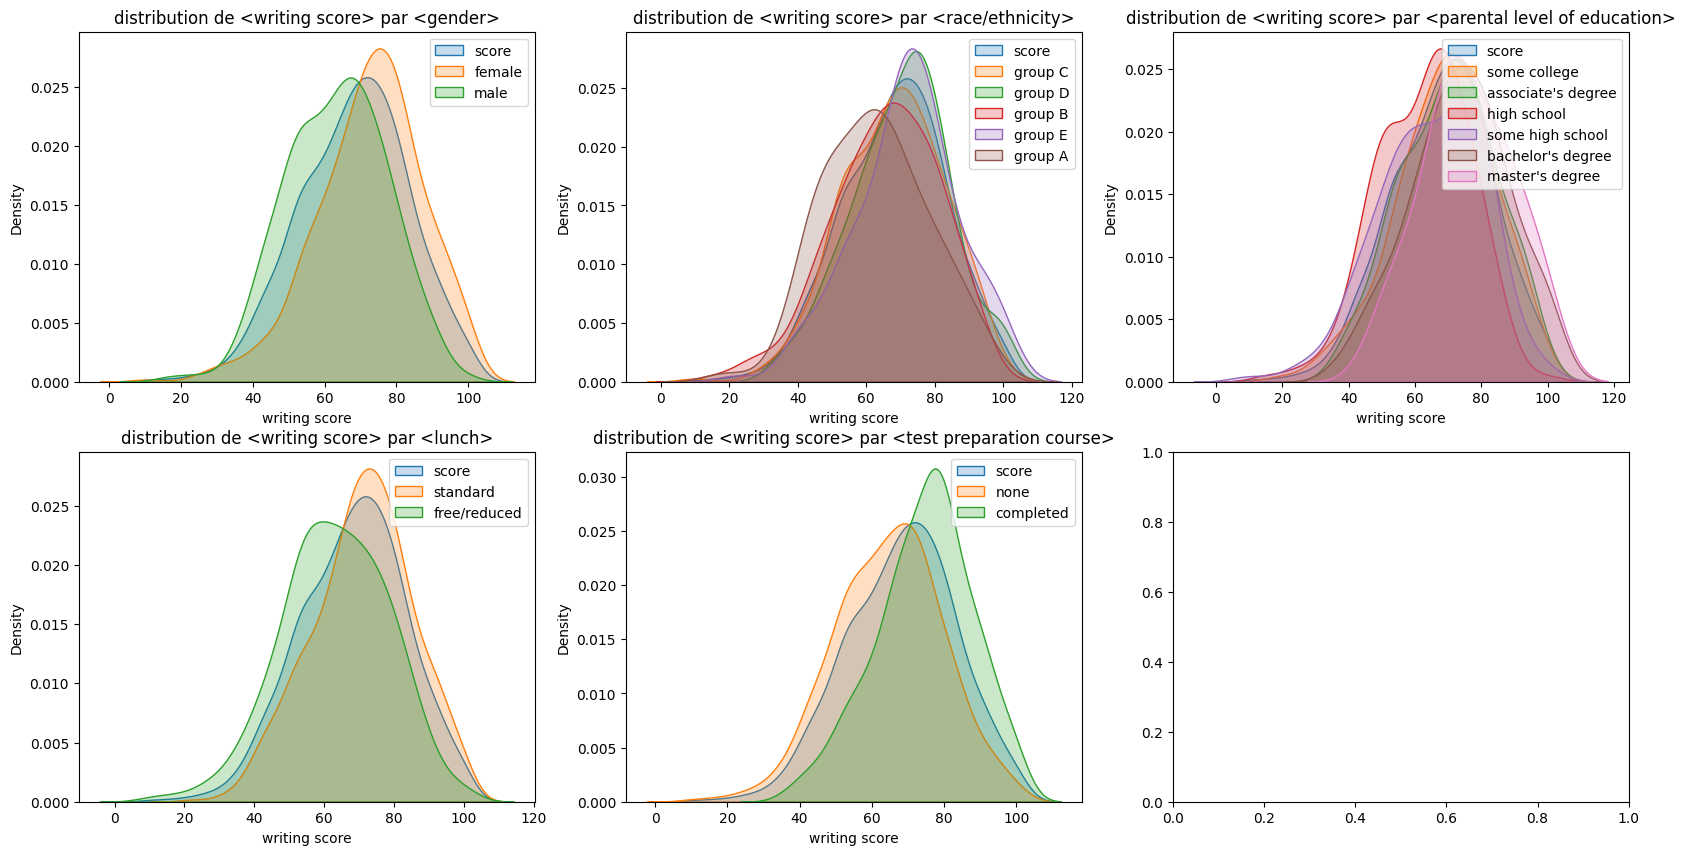

<< score_mean >>


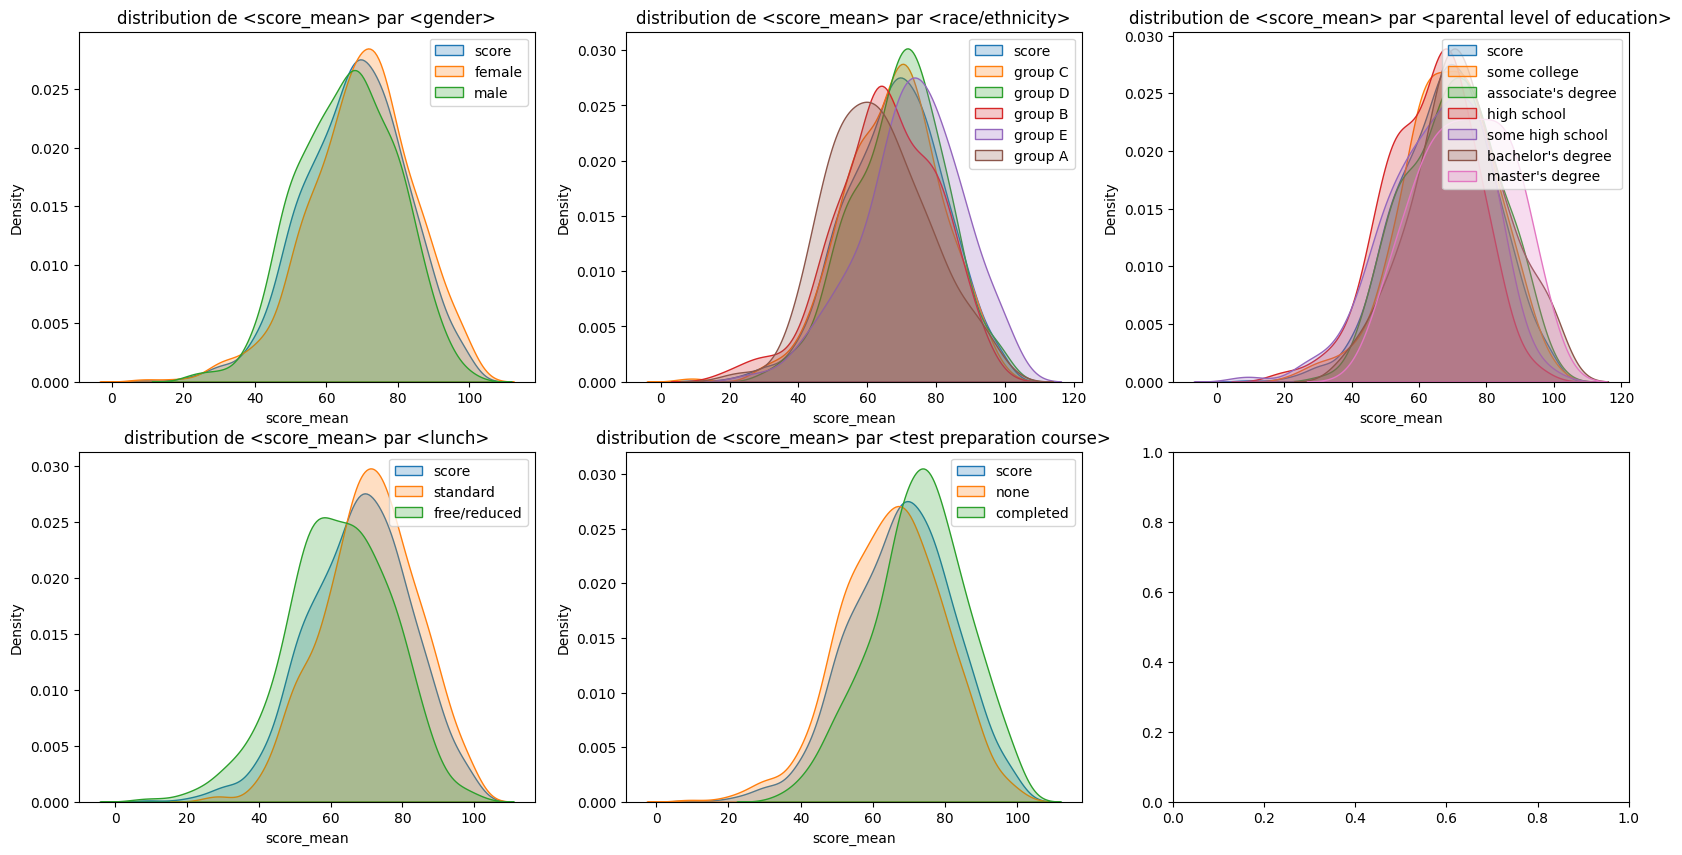

In [50]:
for column in scores_columns:
    print("<<",column,">>")
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    for index, feature in enumerate(features_columns):
        row = index // 3
        col = index % 3
        sns.kdeplot(students[column], fill=True,
                    label="score", ax=ax[row][col])
        for value in students[feature].value_counts().index:
            sns.kdeplot(students[students[feature] == value][column],
                        fill=True, label=value, ax=ax[row][col])
        ax[row][col].legend()
        ax[row][col].set_title(f"distribution de <{column}> par <{feature}>")

    plt.show()

Analyse et visualisation de la moyenne des différents scores en fonction de chaque feature

<< math score >>

< gender >
female :  63.633204633204635
male :  68.72821576763485

< race/ethnicity >
group C :  64.46394984326018
group D :  67.36259541984732
group B :  63.45263157894737
group E :  73.82142857142857
group A :  61.62921348314607

< parental level of education >
some college :  67.1283185840708
associate's degree :  67.88288288288288
high school :  62.13775510204081
some high school :  63.497206703910614
bachelor's degree :  69.38983050847457
master's degree :  69.7457627118644

< lunch >
standard :  70.03410852713178
free/reduced :  58.92112676056338

< test preparation course >
none :  64.0778816199377
completed :  69.69553072625699


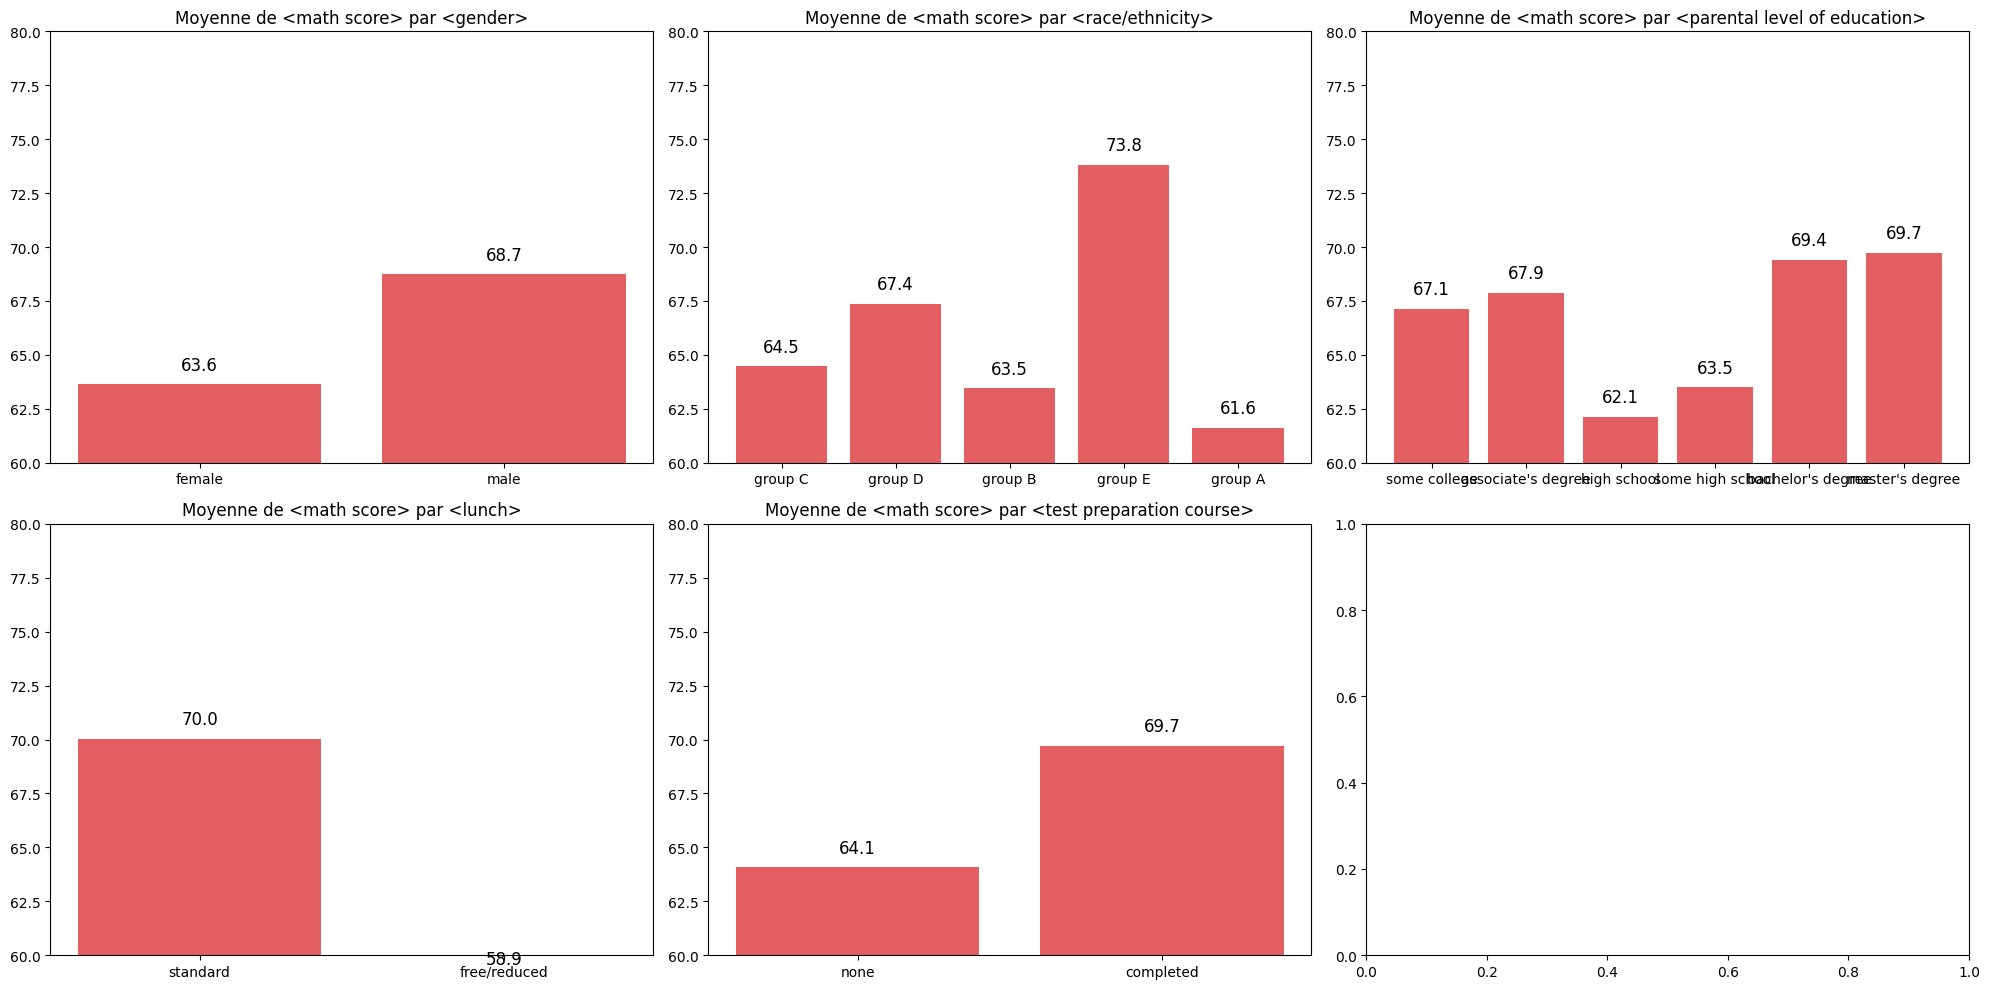

<< reading score >>

< gender >
female :  72.60810810810811
male :  65.47302904564316

< race/ethnicity >
group C :  69.10344827586206
group D :  70.03053435114504
group B :  67.35263157894737
group E :  73.02857142857142
group A :  64.67415730337079

< parental level of education >
some college :  69.46017699115045
associate's degree :  70.92792792792793
high school :  64.70408163265306
some high school :  66.93854748603351
bachelor's degree :  73.0
master's degree :  75.37288135593221

< lunch >
standard :  71.65426356589147
free/reduced :  64.65352112676057

< test preparation course >
none :  66.53426791277259
completed :  73.89385474860335


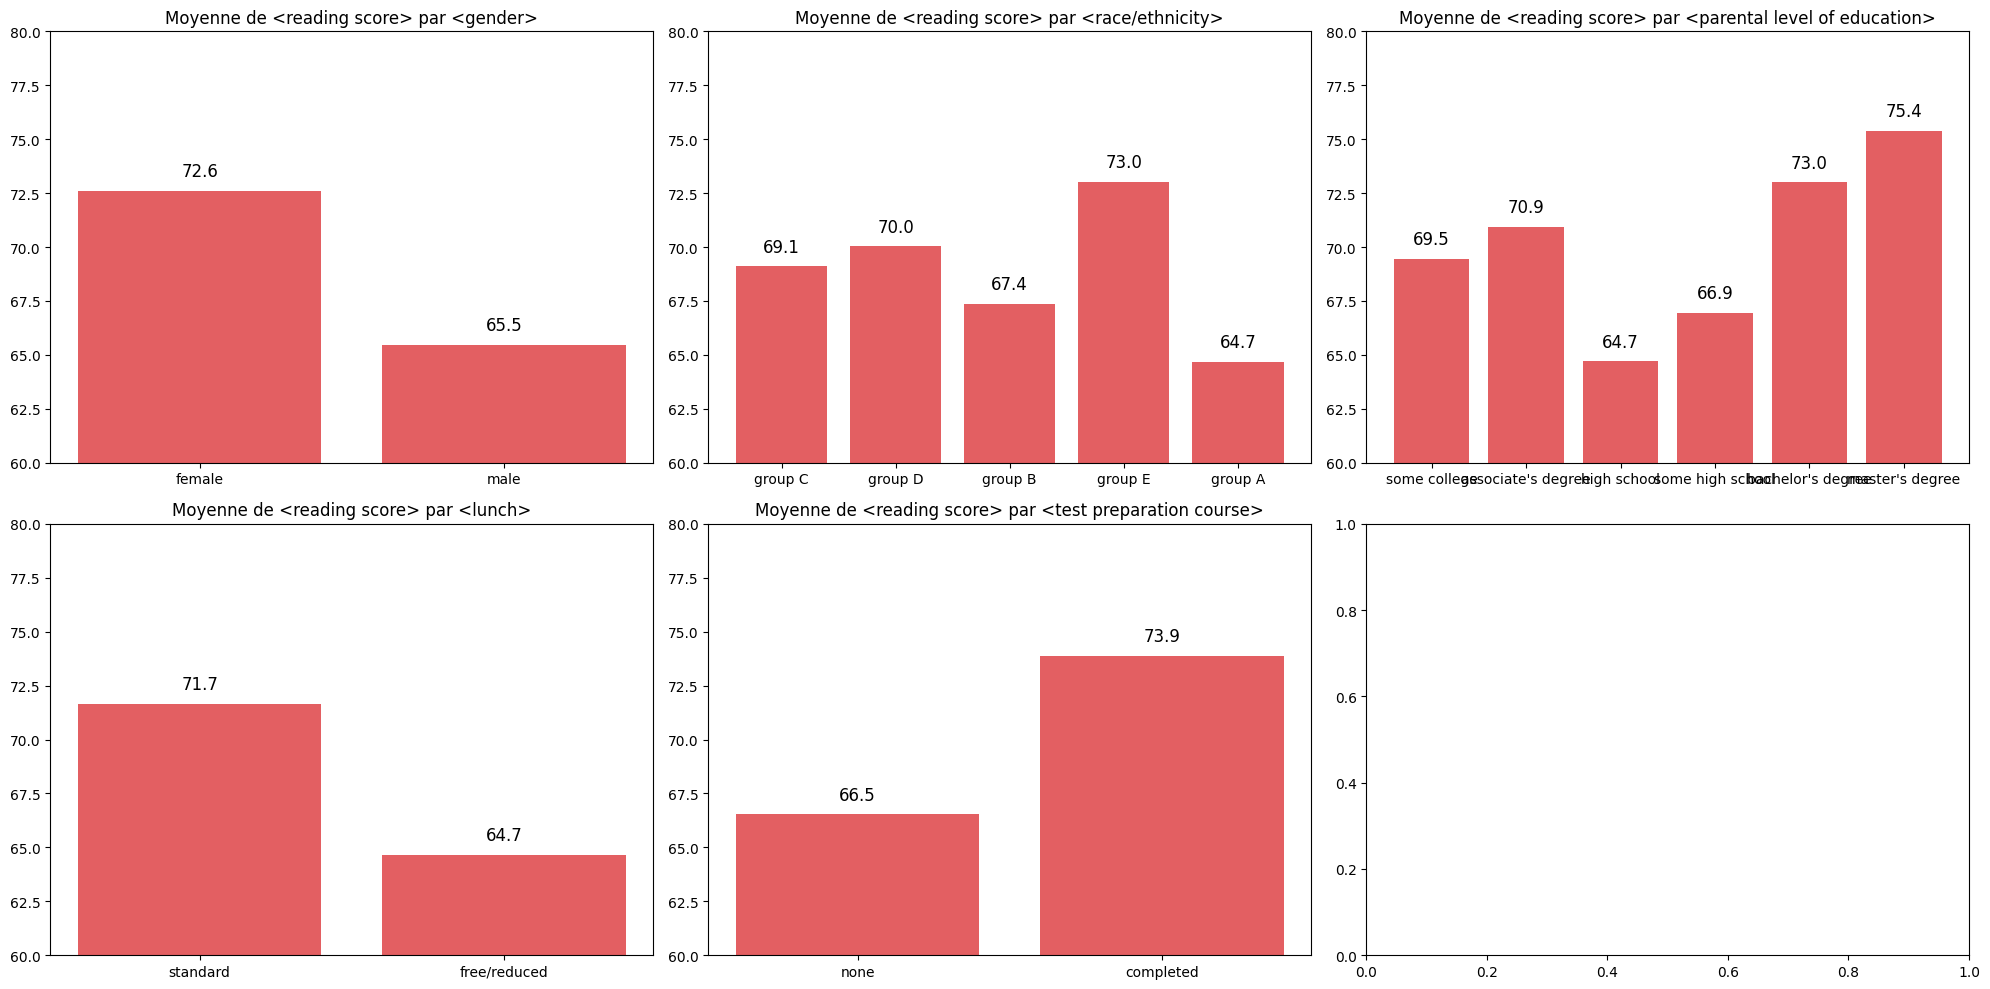

<< writing score >>

< gender >
female :  72.46718146718146
male :  63.31120331950208

< race/ethnicity >
group C :  67.82758620689656
group D :  70.14503816793894
group B :  65.6
group E :  71.40714285714286
group A :  62.674157303370784

< parental level of education >
some college :  68.84070796460178
associate's degree :  69.8963963963964
high school :  62.44897959183673
some high school :  64.88826815642459
bachelor's degree :  73.38135593220339
master's degree :  75.67796610169492

< lunch >
standard :  70.8232558139535
free/reduced :  63.02253521126761

< test preparation course >
none :  64.50467289719626
completed :  74.41899441340782


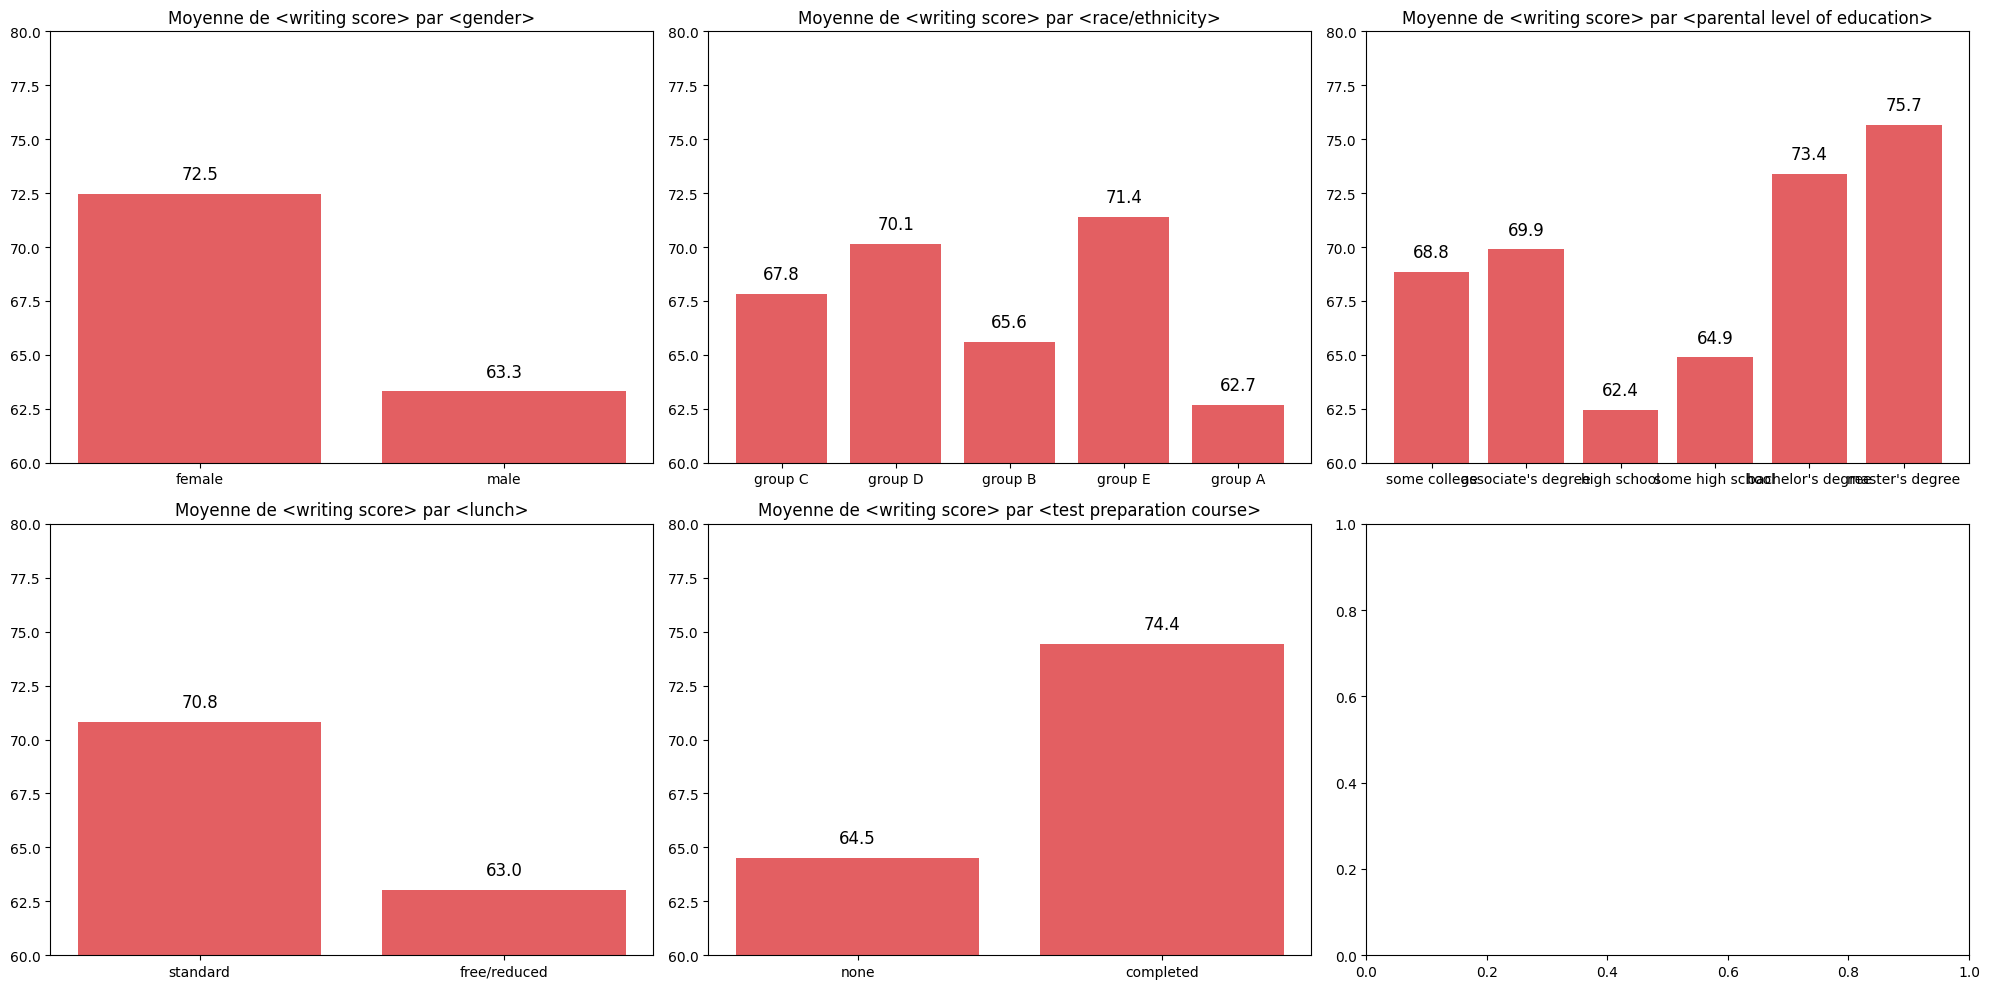

<< score_mean >>

< gender >
female :  69.56949806949807
male :  65.83568464730291

< race/ethnicity >
group C :  67.1307210031348
group D :  69.1793893129771
group B :  65.47
group E :  72.74857142857142
group A :  62.98876404494382

< parental level of education >
some college :  68.47345132743362
associate's degree :  69.56801801801801
high school :  63.099489795918366
some high school :  65.104469273743
bachelor's degree :  71.92627118644067
master's degree :  73.59661016949153

< lunch >
standard :  70.83627906976743
free/reduced :  62.19830985915493

< test preparation course >
none :  65.03753894080997
completed :  72.66955307262569


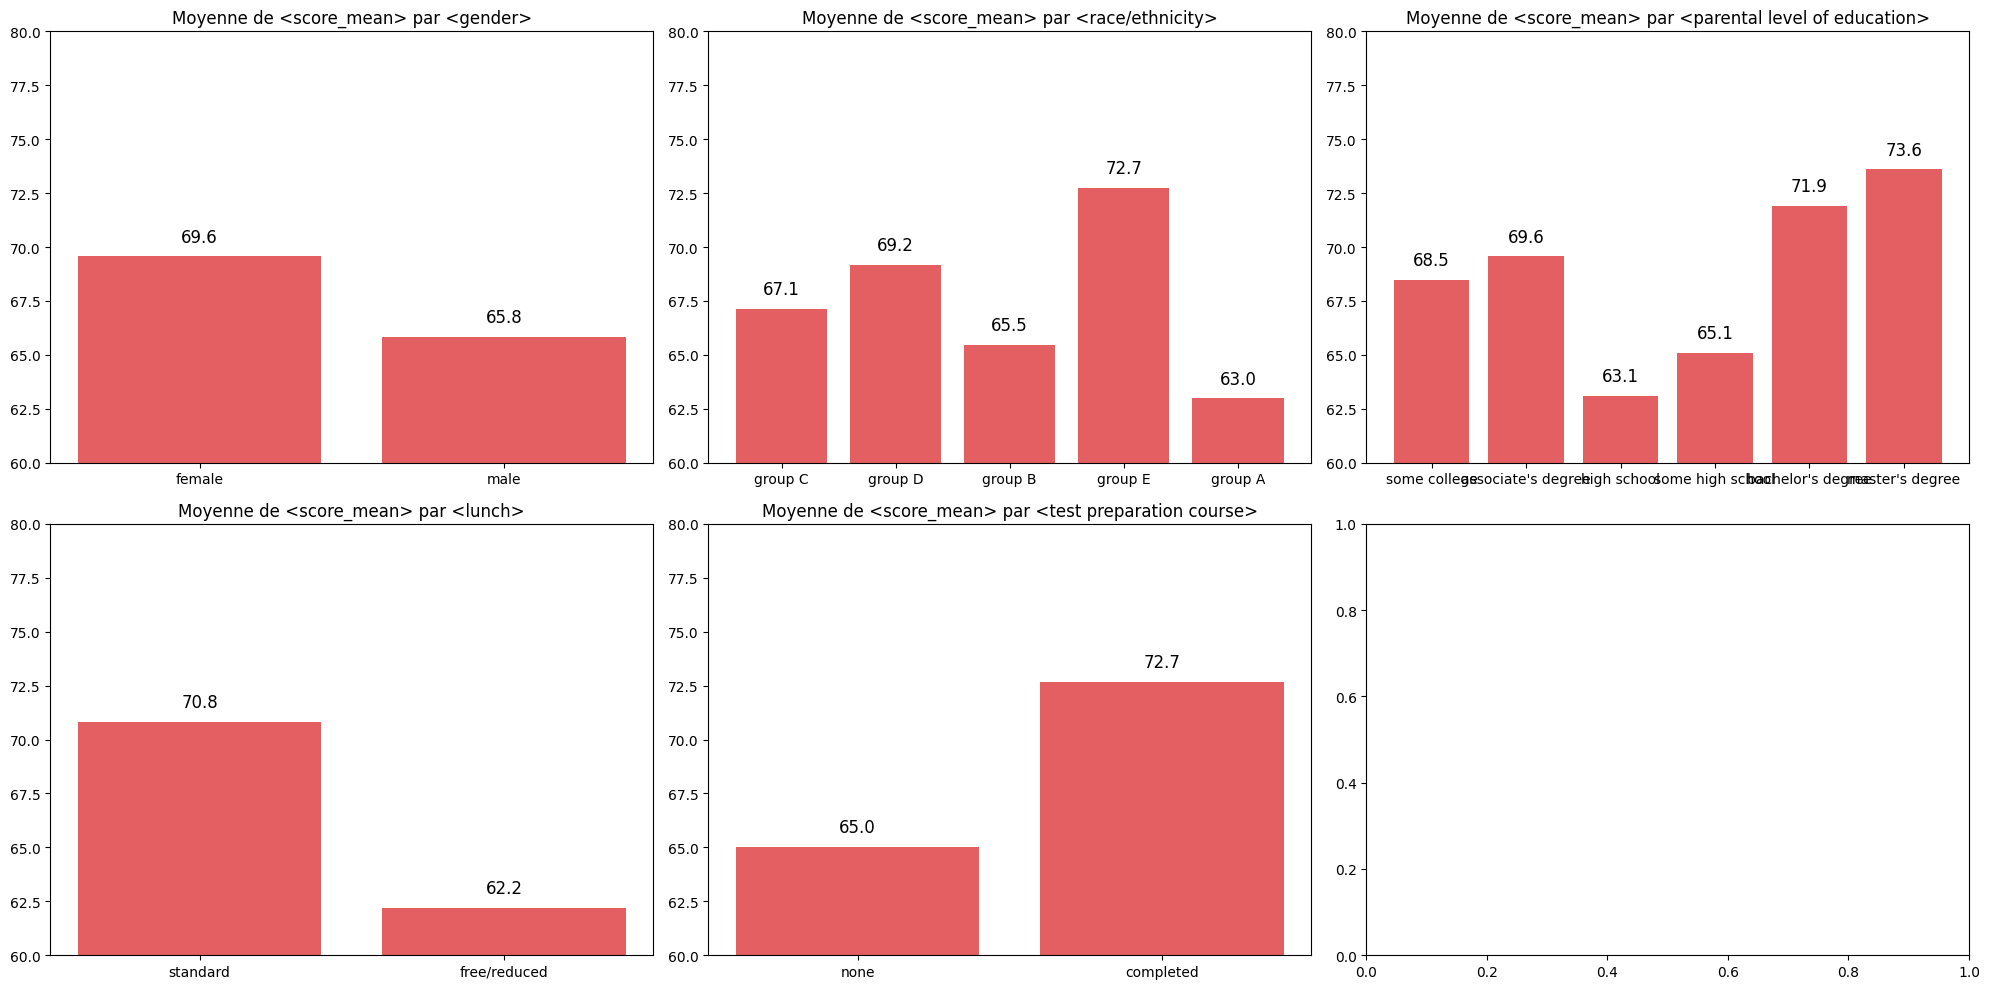

In [51]:
for column in scores_columns:
    print("<<", column, ">>")
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    ax = ax.flatten()
    for index, feature in enumerate(features_columns):
        print("")
        print("<", feature, ">")
        x = []
        y = []
        for j in students[feature].value_counts().index:
            print(j, ": ", np.mean(
                students[students[feature] == j][column].values))
            x.append(j)
            y.append(
                np.mean(students[students[feature] == j][column].values))
        plt.sca(ax[index])
        plt.bar(x, y, color='#e35f62')
        for b in range(len(x)):
            height = y[b]
            plt.text(x[b], height + 0.5, '%.1f' %
                     height, ha='center', va='bottom', size=12)
        plt.ylim(60, 80)
        plt.title(f"Moyenne de <{column}> par <{feature}>")
    plt.tight_layout()
    plt.show()

## 2. Pré-traitement

### 2.1. Normalisation du dataset

Importation des modules de pre-processing

In [62]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler

In [58]:
students_1 = students.copy() # une petite copie, on ne sait jamais :)

Encodage des variables qualitatives

In [66]:
encoder = OrdinalEncoder()
# encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(students_1.loc[:,'gender':'test preparation course'])
encoded_features

array([[0., 1., 1., 1., 1.],
       [0., 2., 4., 1., 0.],
       [0., 1., 3., 1., 1.],
       ...,
       [0., 2., 2., 0., 0.],
       [0., 3., 4., 1., 0.],
       [0., 3., 4., 0., 1.]])

Normalisation des variables qualitatives

In [67]:
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(encoded_features)
normalized_features

array([[0.  , 0.25, 0.2 , 1.  , 1.  ],
       [0.  , 0.5 , 0.8 , 1.  , 0.  ],
       [0.  , 0.25, 0.6 , 1.  , 1.  ],
       ...,
       [0.  , 0.5 , 0.4 , 0.  , 0.  ],
       [0.  , 0.75, 0.8 , 1.  , 0.  ],
       [0.  , 0.75, 0.8 , 0.  , 1.  ]])

Mise à jour du dataset avec les variables qualitatives normalisées

In [68]:
students_1.loc[:,'gender':'test preparation course'] = normalized_features
students_1.sample(5)

C:\Users\Juste KOUASSI\AppData\Local\Temp\ipykernel_5408\1450968983.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  students_1.loc[:,'gender':'test preparation course'] = normalized_features


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean
430,1.0,0.50,0.0,0.0,1.0,64,66,59,63.0
473,0.0,0.75,1.0,1.0,1.0,59,67,61,62.3
779,1.0,1.00,0.0,1.0,0.0,94,85,82,87.0
332,1.0,1.00,0.0,1.0,0.0,62,56,53,57.0
720,0.0,0.50,0.8,0.0,1.0,62,72,70,68.0


Normalisation des variables quantitatives

In [70]:
normalized_scores = scaler.fit_transform(students_1.loc[:,'math score':'score_mean'])
normalized_scores

array([[0.72      , 0.6626506 , 0.71111111, 0.7       ],
       [0.69      , 0.87951807, 0.86666667, 0.80549451],
       [0.9       , 0.93975904, 0.92222222, 0.91978022],
       ...,
       [0.59      , 0.65060241, 0.61111111, 0.61538462],
       [0.68      , 0.73493976, 0.74444444, 0.71758242],
       [0.77      , 0.8313253 , 0.84444444, 0.81318681]])

Mise à jour du dataset avec les variables qualitatives normalisées

In [72]:
students_1.loc[:,'math score':'score_mean'] = normalized_scores
students_1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean
0,0.0,0.25,0.2,1.0,1.0,0.72,0.662651,0.711111,0.700000
1,0.0,0.50,0.8,1.0,0.0,0.69,0.879518,0.866667,0.805495
2,0.0,0.25,0.6,1.0,1.0,0.90,0.939759,0.922222,0.919780
3,1.0,0.00,0.0,0.0,1.0,0.47,0.481928,0.377778,0.442857
4,1.0,0.50,0.8,1.0,1.0,0.76,0.734940,0.722222,0.739560


Bien. Toutes nos variables sont encodées et normalisées.

Matrice de corrélation de toutes les variables

<AxesSubplot: title={'center': 'Corrélation des features'}>

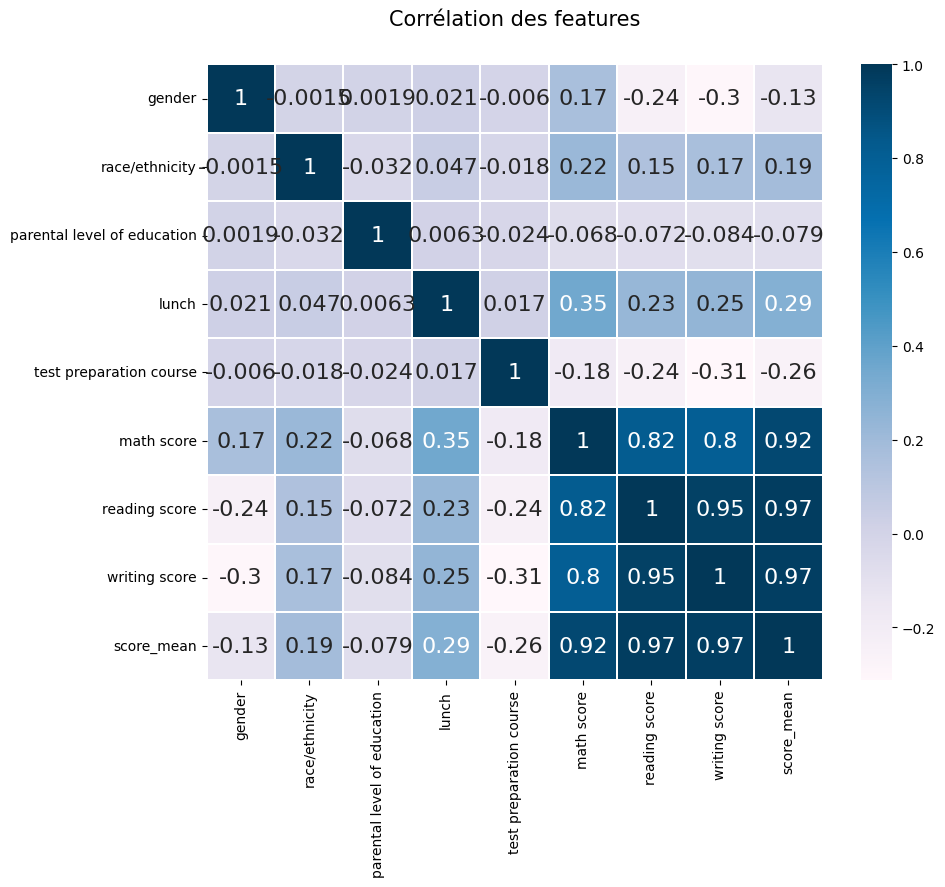

In [75]:
plt.figure(figsize=(10, 8))
plt.title("Corrélation des features", y=1.05, size=15)
sns.heatmap(students_1.corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=plt.cm.PuBu, linecolor="white", annot=True, annot_kws={"size": 16})

### 2.2. Machine Learning

Tout d'abord, ajoutons une nouvelle colonne 'exam_result' à notre dataset pour savoir si un élève est admis ou pas.

Supposons que la moyenne minimale de validation est 60 sur 100 (eh oui, c'est une école d'élites -_-)

In [76]:
exam_result = []
for i in range(len(students_1)):
    exam_result.append(1) if students_1['score_mean'][i] >= 0.6 else exam_result.append(0)
students_1['exam_result'] = exam_result
students_1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_mean,exam_result
0,0.0,0.25,0.2,1.0,1.0,0.72,0.662651,0.711111,0.700000,1
1,0.0,0.50,0.8,1.0,0.0,0.69,0.879518,0.866667,0.805495,1
2,0.0,0.25,0.6,1.0,1.0,0.90,0.939759,0.922222,0.919780,1
3,1.0,0.00,0.0,0.0,1.0,0.47,0.481928,0.377778,0.442857,0
4,1.0,0.50,0.8,1.0,1.0,0.76,0.734940,0.722222,0.739560,1


In [87]:
X = students_1[features_columns] # la matrice des features
y = students_1['exam_result'] # la target

Importation des modules pour le Machine Learning

In [84]:
from sklearn.model_selection import train_test_split

Création de l'ensemble d'apprentissage (train set) et de l'ensemble de test (test set)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Modélisation

### 3.1. Choix du modèle

Importation des modules

In [94]:
#Machine Learning
## model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
## tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Réalisons une étude de performance de certains modèles

In [106]:
k_fold = KFold(n_splits = 7, shuffle=True)

In [107]:
knn = KNeighborsClassifier(n_neighbors=13)  # KNN
dtc = DecisionTreeClassifier()  # Decision Tree
rfc = RandomForestClassifier(n_estimators=13)  # Random Forest
gnb = GaussianNB()  # Naive Bayes
svc = SVC()  # SVC
gbc = GradientBoostingClassifier()

# Machine learning model
clf_list = [knn, dtc, rfc, gnb, svc, gbc]

In [108]:
score_list = []
score_name = []
for model in clf_list:
    score = cross_val_score(model, X_train, y_train,
                            cv=k_fold, n_jobs=1, scoring="accuracy")
    score_name.append(str(model))
    score = round(np.mean(score)*100, 2)
    score_list.append(score)

<BarContainer object of 6 artists>

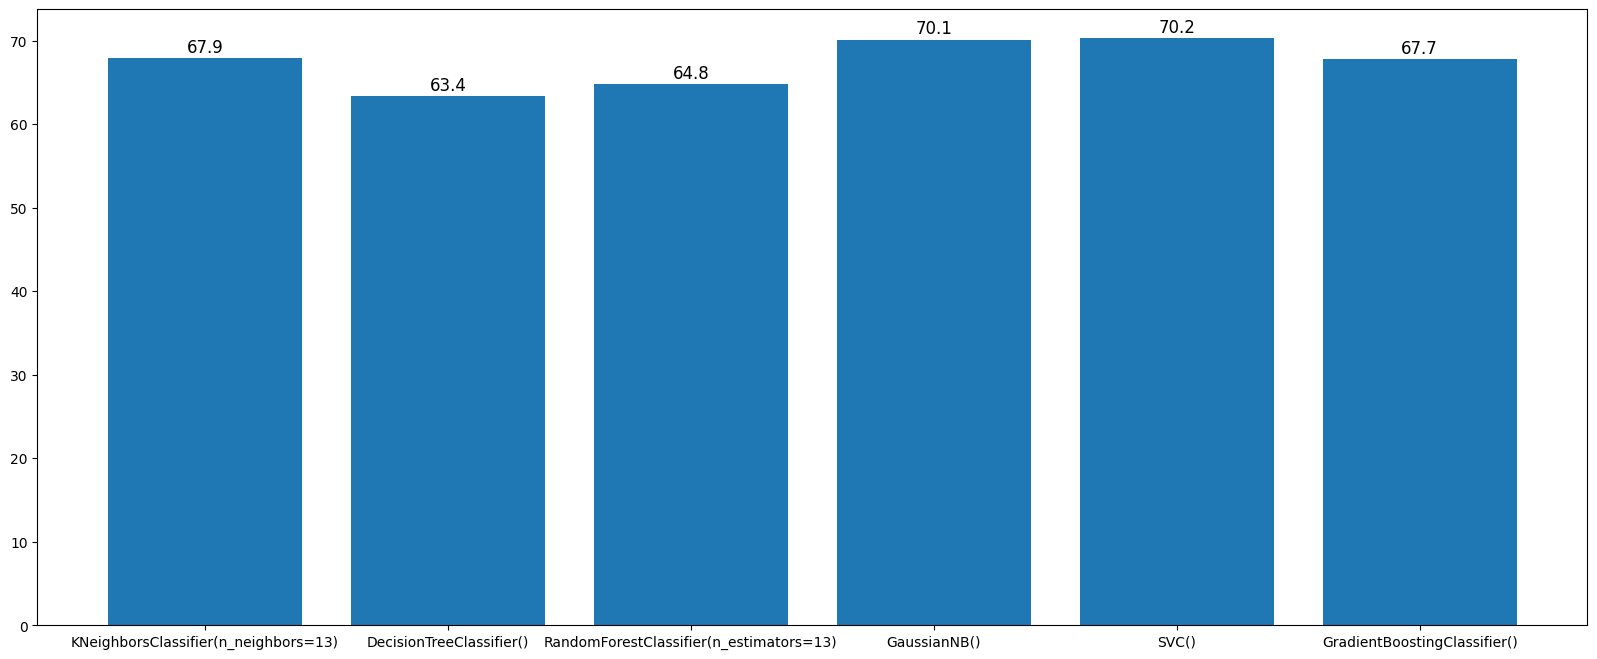

In [109]:
plt.figure(figsize=(20, 8))
x = score_name
y = score_list
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %
             height, ha='center', va='bottom', size=12)
plt.bar(x, y)

Les modèles GaussianNB, SVC, KNN obtiennet les meilleurs scores pour le moment avec les paramètres par défaut.

In [110]:
from sklearn.preprocessing import MaxAbsScaler, RobustScaler, StandardScaler

hg_score_name = []
hg_score_score = []
hg_model = [gnb, svc, knn]

# Scaling Model
ssc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rsc = RobustScaler()

scl_list = [ssc, mms, mas, rsc]
for scl in scl_list:
    scl.fit(X_train)
    train_data = scl.transform(X_train)
    test_data = scl.transform(X_test)
    for mdl in hg_model:
        score = cross_val_score(mdl, train_data, y_train,
                                cv=k_fold, n_jobs=1, scoring="accuracy")
        hg_score_name.append(str(scl)+" : "+str(mdl))
        score = round(np.mean(score)*100, 2)
        hg_score_score.append(score)

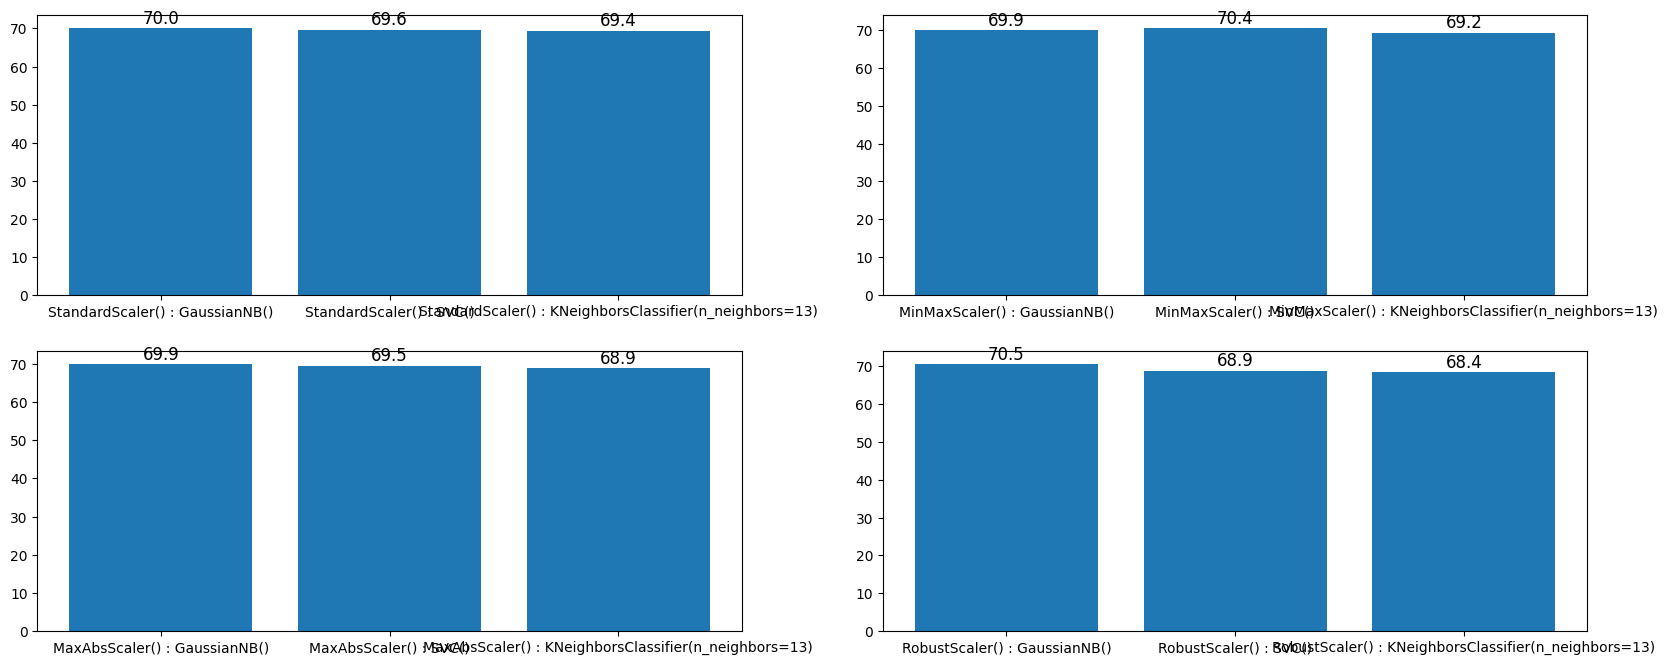

In [111]:
plt.figure(figsize=(20, 10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    x = hg_score_name[(3*i):+(3*i)+3]
    y = hg_score_score[(3*i):+(3*i)+3]
    for i in range(len(x)):
        height = y[i]
        plt.text(x[i], height + 0.25, '%.1f' %
                 height, ha='center', va='bottom', size=12)
    plt.bar(x, y)


Et GausssianNB remporte 3 matchs sur 4 avec un meilleur score en utilisant le robust scaling. Nous allons donc choisir le modèle Gaussian Naive Bayes avec le Robust scalling model.

Recherche des meilleurs paramètres

In [112]:
# Set Scaling Model
scl = RobustScaler()
scl.fit(X_train)
train_data = scl.transform(X_train)

In [113]:
priors_range = np.arange(0.1, 1, 0.001)
scores = []
# loop over the range of priors and evaluate the performance of the model using 5-fold cross-validation
for prior in priors_range:
    clf = GaussianNB(priors=[prior, 1-prior])
    cv_scores = cross_val_score(clf, train_data, y_train, cv=7)
    scores.append(np.mean(cv_scores))

# find the optimal prior that gives the highest cross-validation score
optimal_prior = priors_range[np.argmax(scores)]
print("Optimal prior: ", optimal_prior)
print("Optimal prior's Score: ", (round(max(scores), 4)*100))

Optimal prior:  0.3780000000000002
Optimal prior's Score:  70.99


In [114]:
optimal_prior = 0.269
clf = GaussianNB(priors=[optimal_prior, 1-optimal_prior])
score = cross_val_score(clf, train_data, y_train, cv=7,
                        n_jobs=1, scoring="accuracy")
score = round(np.mean(score)*100, 2)
print(score)

69.12


In [119]:
clf.fit(X_train, y_train)
gnb_test_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.65

Optimisation des hyperparamètres du modèle RandomForestClassifier grâce à GridSearchCV

In [139]:
params = {
    'random_state': (0, 10, 20, 30),
    'n_estimators': (10, 30),
    'max_depth': (3, 5),
    'min_samples_leaf': (4, 8),
    'min_samples_split': (4, 8)
}
rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=2, n_jobs=-1)

In [140]:
grid_cv.fit(X_train, y_train)

print('Hyperparamètres optimaux:', grid_cv.best_params_)
print('Optimal prediction accuracy: {0:.4f}'.format(grid_cv.best_score_))

Optimal Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 10, 'random_state': 10}
Optimal prediction accuracy: 0.7037


In [153]:
rf_model = RandomForestClassifier(
    n_estimators=30, random_state=50, max_depth=3, min_samples_leaf=8, min_samples_split=30)
rf_model.fit(X_train, y_train)
rfc_test_pred = rf_model.predict(X_test)
rf_model.score(X_test, y_test)

0.68

In [ ]:
x = ["rfc", "gnb"]
y = [rf_model.score(X_test, y_test), clf.score(X_test, y_test)]

for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height, '%.4f' % height, ha='center', va='bottom', size=12)
plt.ylim(0.7, 0.75)
plt.bar(x, y, color='#e35f62')

In [154]:
gnb_yt = []
rfc_yt = []
for ans in range(len(y_test.values)):
    if gnb_test_pred[ans] == y_test.values[ans]:
        gnb_yt.append("o")
    if gnb_test_pred[ans] != y_test.values[ans]:
        gnb_yt.append("x")
    if rfc_test_pred[ans] == y_test.values[ans]:
        rfc_yt.append("o")
    if rfc_test_pred[ans] != y_test.values[ans]:
        rfc_yt.append("x")

In [155]:
print(np.array(gnb_yt))
print("Nombre de bonnes réponses : ", np.array(gnb_yt).tolist().count("o"))

['o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'x'
 'x' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'x' 'x' 'o' 'o' 'x' 'x'
 'o' 'x' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o'
 'o' 'x' 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'o'
 'o' 'x' 'x' 'x' 'o' 'x' 'o' 'x' 'o' 'x' 'o' 'x' 'o' 'x' 'x' 'o' 'o' 'o'
 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'o'
 'x' 'o' 'x' 'o' 'x' 'x' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'o'
 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'x' 'x' 'x' 'x' 'o' 'x' 'x' 'o' 'o' 'o' 'o'
 'o' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'x' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'o'
 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'x'
 'o' 'o' 'o' 'x' 'x' 'x' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'x' 'o' 'x' 'o'
 'x' 'o']
Nombre de bonnes réponses :  130
